In [2]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the training data
df_train = pd.read_csv('sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Loading the testing data
df_test = pd.read_csv('sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
print('The training set shape:', df_train.shape)
print('The testing set shape:', df_test.shape)

The training set shape: (27455, 785)
The testing set shape: (7172, 785)


## Basic Data Exploration

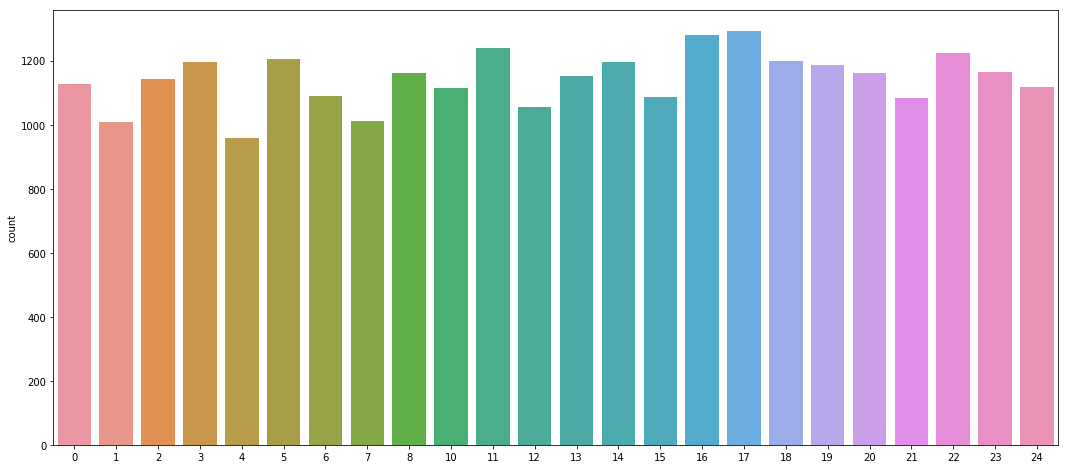

In [6]:
plt.figure(figsize = (18,8))
sns.countplot( x = df_train['label'].values)

In [7]:
# Extracting the labels from the training data
train_labels = df_train['label'].as_matrix()
train_labels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [8]:
# Removing the column 'label' from the training set
del df_train['label']   # deleted once
training = df_train.as_matrix()
training

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [9]:
# Extracting the labels from the testing data
test_labels = df_test['label'].as_matrix()
test_labels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [10]:
# Removing the column 'label' from the testing set
del df_test['label']   # deleted once
testing = df_test.as_matrix()
testing

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]], dtype=int64)

## Building the Convolutional Neural Network

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(25, activation = 'softmax'))

In [12]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [13]:
training

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [14]:
training = training.reshape((27455, 28,28,1))
training = training.astype('float32')/255
testing = testing.reshape((7172, 28,28,1))
testing = testing.astype('float32')/255
# training

In [15]:
# print(training)
# we get normalised data
training.shape

(27455, 28, 28, 1)

In [16]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
print(train_labels.shape)
test_labels = to_categorical(test_labels)
print(test_labels.shape)

(27455, 25)
(7172, 25)


In [17]:
training.shape

(27455, 28, 28, 1)

In [18]:
h = model.fit(training, train_labels, epochs =5, batch_size=16)

Epoch 1/5
27455/27455 [==============================] - 39s 1ms/step - loss: 0.9226 - accuracy: 0.7107 3s - loss: 0.997 - ETA: 1s - loss: 0.9581  - E
Epoch 2/5
27455/27455 [==============================] - 36s 1ms/step - loss: 0.0508 - accuracy: 0.9839
Epoch 3/5
27455/27455 [==============================] - 36s 1ms/step - loss: 0.0149 - accuracy: 0.9958 1s - l - ETA: 0s - loss: 0.0148 - ac
Epoch 4/5
27455/27455 [==============================] - 36s 1ms/step - loss: 0.0101 - accuracy: 0.9972
Epoch 5/5
27455/27455 [==============================] - 36s 1ms/step - loss: 0.0066 - accuracy: 0.9981


In [19]:
plt.plot(h.history['acc'])
plt.plot(h.histotry['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

KeyError: 'acc'

In [35]:
test_loss, test_acc = model.evaluate(testing, test_labels)

7172/7172 [==============================] - 4s 582us/step


In [36]:
print('The accuracy of the above CNN model is', test_acc )

The accuracy of the above CNN model is 0.9323759078979492


# User Image Prediction

In [37]:
import PIL

In [38]:
from PIL import Image

In [39]:
#Dict to convert the output to readable format
dict1 = {0:'A',
        1:'B',
        2:'C',
        3:'D',
        4:'E',
        5:'F',
        6:'G',
        7:'H',
        8:'I',
        9:'J',
        10:'K',
        11:'L',
        12:'M',
        13:'N',
        14:'O',
        15:'P',
        16:'Q',
        17:'R',
        18:'S',
        19:'T',
        20:'U',
        21:'V',
        22:'W',
        23:'X',
        24:'Y',
        25:'Z'}

# Image1

In [40]:
im = Image.open("IMG_20190930_153858700.jpg")

In [41]:
im

In [42]:
pix_val = list(im.getdata())

In [43]:
print(pix_val[0])

(196, 196, 196)


In [44]:
pix_list = []
for i in pix_val:
    x = i[0]
    pix_list.append(x)

In [45]:
pix_list

[196,
 195,
 194,
 194,
 194,
 193,
 192,
 192,
 191,
 192,
 192,
 191,
 191,
 193,
 194,
 193,
 193,
 192,
 192,
 193,
 194,
 194,
 193,
 191,
 192,
 192,
 192,
 194,
 196,
 195,
 194,
 194,
 194,
 193,
 193,
 193,
 193,
 193,
 192,
 192,
 192,
 193,
 194,
 193,
 193,
 193,
 193,
 194,
 195,
 195,
 194,
 193,
 192,
 191,
 192,
 194,
 196,
 194,
 194,
 194,
 194,
 193,
 192,
 193,
 192,
 191,
 190,
 191,
 192,
 193,
 193,
 193,
 192,
 192,
 193,
 193,
 194,
 193,
 193,
 192,
 191,
 191,
 192,
 194,
 195,
 193,
 193,
 193,
 193,
 192,
 192,
 192,
 191,
 189,
 189,
 191,
 192,
 192,
 192,
 194,
 191,
 192,
 193,
 193,
 193,
 192,
 192,
 192,
 191,
 191,
 192,
 193,
 194,
 192,
 192,
 192,
 192,
 191,
 191,
 191,
 190,
 189,
 189,
 190,
 190,
 190,
 191,
 192,
 190,
 191,
 192,
 192,
 192,
 192,
 192,
 192,
 190,
 190,
 191,
 192,
 192,
 191,
 190,
 190,
 191,
 190,
 189,
 190,
 188,
 188,
 188,
 187,
 188,
 189,
 190,
 189,
 188,
 188,
 189,
 190,
 191,
 191,
 190,
 190,
 188,
 188,
 189

In [46]:
np_pix1 = np.asarray(pix_list)
np_pix1

array([196, 195, 194, 194, 194, 193, 192, 192, 191, 192, 192, 191, 191,
       193, 194, 193, 193, 192, 192, 193, 194, 194, 193, 191, 192, 192,
       192, 194, 196, 195, 194, 194, 194, 193, 193, 193, 193, 193, 192,
       192, 192, 193, 194, 193, 193, 193, 193, 194, 195, 195, 194, 193,
       192, 191, 192, 194, 196, 194, 194, 194, 194, 193, 192, 193, 192,
       191, 190, 191, 192, 193, 193, 193, 192, 192, 193, 193, 194, 193,
       193, 192, 191, 191, 192, 194, 195, 193, 193, 193, 193, 192, 192,
       192, 191, 189, 189, 191, 192, 192, 192, 194, 191, 192, 193, 193,
       193, 192, 192, 192, 191, 191, 192, 193, 194, 192, 192, 192, 192,
       191, 191, 191, 190, 189, 189, 190, 190, 190, 191, 192, 190, 191,
       192, 192, 192, 192, 192, 192, 190, 190, 191, 192, 192, 191, 190,
       190, 191, 190, 189, 190, 188, 188, 188, 187, 188, 189, 190, 189,
       188, 188, 189, 190, 191, 191, 190, 190, 188, 188, 189, 191, 189,
       188, 188, 188, 188, 187, 187, 188, 186, 187, 186, 185, 18

In [47]:
np_pix1 = np_pix1.reshape((1, 28,28,1))
np_pix1 = np_pix1.astype('float32')/255

In [48]:
np_pix1

array([[[[0.76862746],
         [0.7647059 ],
         [0.7607843 ],
         [0.7607843 ],
         [0.7607843 ],
         [0.75686276],
         [0.7529412 ],
         [0.7529412 ],
         [0.7490196 ],
         [0.7529412 ],
         [0.7529412 ],
         [0.7490196 ],
         [0.7490196 ],
         [0.75686276],
         [0.7607843 ],
         [0.75686276],
         [0.75686276],
         [0.7529412 ],
         [0.7529412 ],
         [0.75686276],
         [0.7607843 ],
         [0.7607843 ],
         [0.75686276],
         [0.7490196 ],
         [0.7529412 ],
         [0.7529412 ],
         [0.7529412 ],
         [0.7607843 ]],

        [[0.76862746],
         [0.7647059 ],
         [0.7607843 ],
         [0.7607843 ],
         [0.7607843 ],
         [0.75686276],
         [0.75686276],
         [0.75686276],
         [0.75686276],
         [0.75686276],
         [0.7529412 ],
         [0.7529412 ],
         [0.7529412 ],
         [0.75686276],
         [0.7607843 ],
         

In [49]:
ans = model.predict_classes(np_pix1)

In [50]:
model.predict(np_pix1)

array([[1.57594694e-15, 0.00000000e+00, 3.25865637e-13, 2.72836043e-09,
        1.48748590e-36, 1.20812566e-17, 1.63808116e-12, 3.09504394e-04,
        6.04339044e-22, 0.00000000e+00, 7.13438231e-33, 1.29507532e-27,
        1.46681655e-22, 3.69729564e-22, 9.14904819e-10, 8.01603399e-29,
        1.61994278e-15, 0.00000000e+00, 9.72855456e-16, 9.99690533e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.79103642e-23,
        4.96561478e-14]], dtype=float32)

# Image 2

In [51]:
im2 = Image.open("IMG_20190930_154114341.jpg")

In [52]:
im2

In [53]:
pix_val2 = list(im2.getdata())

In [54]:
print(pix_val2[0])

(177, 177, 177)


In [55]:
pix_list2 = []
for i in pix_val2:
    x = i[0]
    pix_list2.append(x)
pix_list2

[177,
 177,
 177,
 177,
 178,
 180,
 181,
 182,
 183,
 183,
 184,
 185,
 186,
 187,
 187,
 188,
 189,
 189,
 190,
 191,
 191,
 191,
 192,
 193,
 193,
 193,
 193,
 194,
 176,
 176,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 182,
 183,
 184,
 185,
 186,
 186,
 187,
 188,
 189,
 190,
 190,
 190,
 191,
 191,
 192,
 191,
 192,
 192,
 193,
 175,
 175,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 181,
 182,
 183,
 184,
 185,
 185,
 186,
 187,
 188,
 189,
 189,
 189,
 190,
 190,
 191,
 190,
 191,
 192,
 192,
 174,
 174,
 175,
 176,
 177,
 178,
 178,
 179,
 179,
 180,
 181,
 181,
 183,
 183,
 184,
 185,
 186,
 187,
 188,
 188,
 189,
 189,
 190,
 190,
 189,
 190,
 191,
 191,
 173,
 173,
 174,
 175,
 176,
 177,
 178,
 178,
 178,
 179,
 180,
 180,
 182,
 182,
 183,
 184,
 185,
 186,
 187,
 187,
 188,
 188,
 189,
 189,
 188,
 188,
 189,
 189,
 171,
 172,
 173,
 174,
 175,
 176,
 176,
 176,
 177,
 178,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 186,
 186,
 187,
 187,
 188,
 188,
 188,
 188

In [56]:
np_pix2 = np.asarray(pix_list2)

In [57]:
np_pix2 = np_pix2.reshape((1, 28,28,1))
np_pix2 = np_pix2.astype('float32')/255

In [58]:
np_pix2

array([[[[0.69411767],
         [0.69411767],
         [0.69411767],
         [0.69411767],
         [0.69803923],
         [0.7058824 ],
         [0.70980394],
         [0.7137255 ],
         [0.7176471 ],
         [0.7176471 ],
         [0.72156864],
         [0.7254902 ],
         [0.7294118 ],
         [0.73333335],
         [0.73333335],
         [0.7372549 ],
         [0.7411765 ],
         [0.7411765 ],
         [0.74509805],
         [0.7490196 ],
         [0.7490196 ],
         [0.7490196 ],
         [0.7529412 ],
         [0.75686276],
         [0.75686276],
         [0.75686276],
         [0.75686276],
         [0.7607843 ]],

        [[0.6901961 ],
         [0.6901961 ],
         [0.6901961 ],
         [0.69411767],
         [0.69803923],
         [0.7019608 ],
         [0.7058824 ],
         [0.70980394],
         [0.7137255 ],
         [0.7137255 ],
         [0.7176471 ],
         [0.72156864],
         [0.7254902 ],
         [0.7294118 ],
         [0.7294118 ],
         

In [59]:
ans2 = model.predict_classes(np_pix2)

In [60]:
val2 = ans2[0]
val2

24

In [61]:
print('The letter is',dict1[val2])

The letter is Y


In [62]:
model.predict(np_pix2)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2481760e-08,
        0.0000000e+00, 0.0000000e+00, 1.8851785e-21, 3.3583164e-10,
        1.7774759e-32, 0.0000000e+00, 2.9112770e-23, 2.1775602e-24,
        1.1067533e-34, 0.0000000e+00, 2.3256629e-31, 2.5575376e-15,
        1.3965700e-14, 2.5862345e-30, 8.5178080e-14, 1.5448772e-22,
        0.0000000e+00, 3.2134329e-14, 0.0000000e+00, 4.3444174e-14,
        1.0000000e+00]], dtype=float32)

# Image 3

In [63]:
im3 = Image.open("IMG_20190930_154108360.jpg")

In [64]:
im3

In [65]:
pix_val3 = list(im3.getdata())

In [66]:
pix_list3 = []
for i in pix_val3:
    x = i[0]
    pix_list3.append(x)
pix_list3

[170,
 171,
 172,
 172,
 172,
 173,
 175,
 177,
 175,
 178,
 179,
 178,
 184,
 180,
 185,
 182,
 185,
 186,
 185,
 187,
 186,
 186,
 186,
 190,
 188,
 189,
 190,
 190,
 169,
 170,
 171,
 171,
 172,
 173,
 174,
 176,
 179,
 176,
 177,
 177,
 179,
 179,
 179,
 186,
 183,
 185,
 184,
 183,
 188,
 191,
 186,
 189,
 188,
 189,
 189,
 189,
 167,
 169,
 170,
 170,
 171,
 172,
 173,
 174,
 175,
 179,
 176,
 179,
 181,
 180,
 184,
 179,
 186,
 185,
 184,
 185,
 186,
 184,
 186,
 186,
 189,
 189,
 189,
 188,
 166,
 167,
 169,
 170,
 170,
 171,
 172,
 173,
 173,
 171,
 178,
 178,
 170,
 183,
 177,
 181,
 182,
 176,
 185,
 185,
 182,
 189,
 190,
 187,
 187,
 187,
 187,
 187,
 165,
 166,
 168,
 169,
 170,
 170,
 171,
 172,
 172,
 182,
 170,
 176,
 182,
 178,
 174,
 187,
 184,
 182,
 184,
 185,
 183,
 186,
 179,
 186,
 184,
 185,
 185,
 185,
 163,
 165,
 167,
 168,
 168,
 169,
 169,
 170,
 176,
 113,
 165,
 176,
 171,
 173,
 186,
 123,
 123,
 187,
 176,
 181,
 184,
 184,
 187,
 180,
 184,
 184,
 183

In [67]:
np_pix3 = np.asarray(pix_list3)
np_pix3 = np_pix3.reshape((1, 28,28,1))
np_pix3 = np_pix3.astype('float32')/255

In [68]:
np_pix3

array([[[[0.6666667 ],
         [0.67058825],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.6862745 ],
         [0.69411767],
         [0.6862745 ],
         [0.69803923],
         [0.7019608 ],
         [0.69803923],
         [0.72156864],
         [0.7058824 ],
         [0.7254902 ],
         [0.7137255 ],
         [0.7254902 ],
         [0.7294118 ],
         [0.7254902 ],
         [0.73333335],
         [0.7294118 ],
         [0.7294118 ],
         [0.7294118 ],
         [0.74509805],
         [0.7372549 ],
         [0.7411765 ],
         [0.74509805],
         [0.74509805]],

        [[0.6627451 ],
         [0.6666667 ],
         [0.67058825],
         [0.67058825],
         [0.6745098 ],
         [0.6784314 ],
         [0.68235296],
         [0.6901961 ],
         [0.7019608 ],
         [0.6901961 ],
         [0.69411767],
         [0.69411767],
         [0.7019608 ],
         [0.7019608 ],
         [0.7019608 ],
         

In [69]:
ans3 = model.predict_classes(np_pix3)

In [70]:
ans3

array([19], dtype=int64)

In [71]:
val3 = ans3[0]

In [72]:
print('The letter is',dict1[val3])

The letter is T


In [73]:
model.predict(np_pix3)

array([[7.4594654e-14, 1.8117729e-17, 3.3077117e-11, 3.5717691e-20,
        2.7768305e-20, 1.7745887e-03, 3.8302643e-22, 2.2089865e-15,
        1.3659684e-06, 7.7638794e-34, 7.6016093e-27, 1.7130520e-15,
        1.1791770e-17, 1.4081209e-12, 6.2265251e-09, 9.1017328e-24,
        6.3425526e-32, 0.0000000e+00, 9.4615221e-17, 9.9822384e-01,
        3.0596057e-30, 5.8254352e-15, 2.3564336e-07, 3.1364711e-12,
        1.4354872e-21]], dtype=float32)

# Image 4

In [74]:
im4 = Image.open("IMG_20190930_153911641.jpg")

In [75]:
im4

In [76]:
pix_val4 = list(im4.getdata())

In [85]:
# pix_val4

In [86]:
pix_list4 = []
for i in pix_val4:
    x = i[0]
    pix_list4.append(x)
# pix_list4

In [79]:
np_pix4 = np.asarray(pix_list4)
np_pix4 = np_pix4.reshape((1, 28,28,1))
np_pix4 = np_pix4.astype('float32')/255

In [80]:
ans4 = model.predict_classes(np_pix4)

In [81]:
ans4

array([7], dtype=int64)

In [82]:
val4 = ans4[0]

In [83]:
print('The letter is',dict1[val4])

The letter is H


# Image 5- Seb

In [89]:
im5 = Image.open("Seb1.jpg")
im5

In [94]:
pix_val5 = list(im5.getdata())
pix_list5 = []
for i in pix_val5:
    x = i[0]
    pix_list5.append(x)
# pix_list5

In [95]:
np_pix5 = np.asarray(pix_list5)
np_pix5 = np_pix5.reshape((1, 28,28,1))
np_pix5 = np_pix5.astype('float32')/255

In [96]:
ans5 = model.predict_classes(np_pix5)
ans5

array([24], dtype=int64)

In [97]:
val5 = ans5[0]
print('The letter is',dict1[val5])

The letter is Y


# Image 6 -Seb

In [101]:
im6 = Image.open("seb2.jpg")
im6

In [102]:
pix_val6 = list(im6.getdata())
pix_list6 = []
for i in pix_val6:
    x = i[0]
    pix_list6.append(x)
# pix_list6
np_pix6 = np.asarray(pix_list6)
np_pix6 = np_pix6.reshape((1, 28,28,1))
np_pix6 = np_pix6.astype('float32')/255
ans6 = model.predict_classes(np_pix6)
ans6

array([5], dtype=int64)

In [103]:
val6 = ans6[0]
print('The letter is',dict1[val6])

The letter is F
